In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('./data/digit-recognizer/train.csv')

In [5]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The column shows 785 which contains one label and each pixel values of the picture.

In [6]:
data = np.array(data)

In order to avoid the generalization of the training set(This avoids the overfitting), we are going to divide the testing data to two parts, one for the dev and the other to be the training set

In [7]:
m, n = data.shape
m, n

(42000, 785)

we could notice that the number of the image that is on the train.csv is 42000.

So m stands for the number of the images and n stands for the number of pixels in a single image

In [8]:
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

In [9]:
X_train[:,:].shape

(784, 41000)

In [24]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

The first Weight is going to be a matrix which has the size of 10x784
The bias would be the matrix of 10x1 and it contains a random number between -0.5 ~ 0.5
The second Weight is going to be a matrix which has the size of 10x10
The bias would be the matrix of 10x1 and it contains a random number between -0.5 ~ 0.5

In [63]:
def ReLU(Z):
    return np.maximum(Z, 0)


def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # make an array size of {# of test image} x {# of result -> 9 + 1}
    one_hot_Y[np.arange(Y.size), Y] = 1 #arange iterates from 0 to Y.size - 1 so it is going to check every row and the each selected Y column is going to be 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2



In [62]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))

    return W1, b1, W2, b2

In [64]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[4 4 9 ... 4 4 4] [6 0 5 ... 7 1 7]
Accuracy:  0.10251219512195121
Iteration:  10
[4 7 2 ... 4 4 0] [6 0 5 ... 7 1 7]
Accuracy:  0.1676829268292683
Iteration:  20
[2 0 2 ... 7 4 0] [6 0 5 ... 7 1 7]
Accuracy:  0.2788048780487805
Iteration:  30
[2 0 2 ... 7 4 0] [6 0 5 ... 7 1 7]
Accuracy:  0.34480487804878046
Iteration:  40
[6 0 2 ... 7 3 0] [6 0 5 ... 7 1 7]
Accuracy:  0.4338048780487805
Iteration:  50
[6 0 2 ... 7 1 0] [6 0 5 ... 7 1 7]
Accuracy:  0.4915121951219512
Iteration:  60
[6 0 2 ... 7 1 0] [6 0 5 ... 7 1 7]
Accuracy:  0.5331951219512195
Iteration:  70
[6 0 2 ... 7 1 0] [6 0 5 ... 7 1 7]
Accuracy:  0.5687560975609756
Iteration:  80
[6 0 2 ... 7 1 0] [6 0 5 ... 7 1 7]
Accuracy:  0.5999756097560975
Iteration:  90
[6 0 3 ... 7 1 0] [6 0 5 ... 7 1 7]
Accuracy:  0.622219512195122
Iteration:  100
[6 0 3 ... 7 1 0] [6 0 5 ... 7 1 7]
Accuracy:  0.6410487804878049
Iteration:  110
[6 0 3 ... 7 1 0] [6 0 5 ... 7 1 7]
Accuracy:  0.656
Iteration:  120
[6 0 3 ... 7 1 0] [6 0 

In [65]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

The function "make_predictions" stands for after the forward propagation you could analyze the output via the input that you inserted

In [66]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


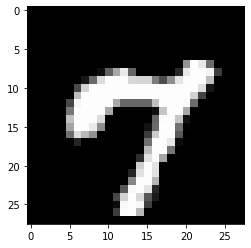

In [68]:
test_prediction(3, W1, b1, W2, b2)

In [69]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 6 6 8 2 9 1 2 8 7 3 0 7 5 2 5 9 9 5 4 8 1 1 9 4 3 3 6 0 2 7 7 1 7 2 6 3
 4 0 6 0 6 1 0 9 2 0 9 3 2 9 6 2 4 8 5 2 9 6 8 2 9 0 8 0 8 3 8 9 5 1 0 8 0
 2 8 1 6 3 4 4 8 5 3 1 6 3 3 3 9 1 1 5 7 3 6 4 9 8 0 2 5 7 0 3 0 2 9 7 9 6
 7 7 1 0 6 6 2 3 3 3 7 5 6 3 4 5 1 4 9 5 0 0 8 3 1 0 6 1 7 3 1 7 5 2 8 9 2
 7 9 3 7 8 5 7 5 5 0 5 6 0 1 4 7 1 1 6 3 7 1 4 9 5 3 1 3 9 9 7 5 1 3 2 7 4
 1 4 7 0 8 3 2 4 8 1 3 2 6 9 8 3 3 9 4 9 2 6 7 3 9 0 8 8 1 1 3 4 7 2 7 6 5
 9 2 5 9 1 3 1 5 7 3 8 0 4 4 6 0 2 0 3 6 1 8 1 2 4 3 3 8 3 3 9 3 5 9 4 9 4
 1 6 8 5 9 1 4 6 0 4 7 6 1 8 3 0 7 0 9 8 7 0 2 0 5 0 3 6 0 1 1 0 2 7 7 6 1
 0 7 7 6 6 1 0 5 5 3 4 1 0 2 1 8 6 1 3 8 1 4 4 6 2 8 3 3 4 4 1 8 0 4 4 3 4
 5 0 3 2 0 1 0 6 0 2 4 8 6 2 9 2 5 8 3 4 0 7 2 4 7 3 7 4 4 2 9 0 9 1 6 8 1
 9 7 9 2 8 9 8 2 1 1 0 0 3 6 0 6 8 9 4 3 8 4 4 5 3 6 0 9 8 6 6 1 2 9 2 2 1
 1 4 1 6 9 3 0 7 1 0 8 2 6 0 3 9 7 9 3 4 1 1 7 6 4 8 5 2 1 9 2 5 4 3 5 8 1
 7 6 8 0 5 3 1 6 7 0 1 6 8 4 8 6 7 6 2 7 0 7 0 6 5 3 8 0 0 6 7 5 4 4 0 4 2
 0 9 3 0 9 8 3 9 1 6 4 3 

0.858